In [4]:
import pandas as pd
import nltk
import string

In [5]:
#open file
import re as rec

tweets = list()
with open('tweets5.txt', encoding="UTF-8") as f:
    for rec in f:
        splitted = rec.split('> ')
        tweets.append(splitted[1:2])
        
tweets

[['Betul, kesehatan dan ekonomi itu sama-sama pentingnya  pic.twitter.com/j7NVdq5jDl\n'],
 ['Pendidikan dan kesehatan memiliki keterkaitan yang erat. Kesehatan yang baik mendukung keberhasilan pembelajaran. Sementara bangsa yang berpendidikan seharusnya sadar akan pentingnya kesehatan.\n'],
 ['Buat pegangan dan keperluan sehari-hari, karna kulon jadi ga dikasi uang jajan :((. Harapan buat tahun ini, semoga covid-19 segera berakhir, dan ga ada pandemi2 lainnya. Semoga masyarakat Indonesia paham pentingnya kesehatan, kebersihan, dan taat sama peraturan pemerintah\n'],
 ['#InovasiPolriutkSemua dalam ketahanan pangan patut di apresiasi dan diberi dukungan.   Untuk itu guys pentingnya menjaga gizi dan asupan yang memberi dampak kesehatan.   https://m.kaskus.co.id/thread/5ec5faf2f0bdb260d2444b06/diet-nggak-pake-laper-nih-gan-quotdiet-makanan-mentahquot/\xa0…\n'],
 ['Pentingnya Elektronik Rekam Medis untuk pelayanan kesehatan di Klinik anda.  pic.twitter.com/odfCGJdkFq\n'],
 ['Mempersiapkan T

In [6]:
#AMBIL ID, TGL, WAKTU
details = list()

with open('tweets5.txt', encoding="UTF-8") as f:
    for rec in f:
        splitted = rec.split(' ')
        details.append(splitted[:3])     
details

[['1267689473690632192', '2020-06-02', '12:28:17'],
 ['1267684590103097345', '2020-06-02', '12:08:53'],
 ['1267684573426495489', '2020-06-02', '12:08:49'],
 ['1267669995917414401', '2020-06-02', '11:10:53'],
 ['1267665918772969472', '2020-06-02', '10:54:41'],
 ['1267663881037438981', '2020-06-02', '10:46:35'],
 ['1267652905454039040', '2020-06-02', '10:02:59'],
 ['1267652864601501696', '2020-06-02', '10:02:49'],
 ['1267652842367537155', '2020-06-02', '10:02:44'],
 ['1267644925421608962', '2020-06-02', '09:31:16'],
 ['1267628381123702784', '2020-06-02', '08:25:32'],
 ['1267615061087891456', '2020-06-02', '07:32:36'],
 ['1267607979504762880', '2020-06-02', '07:04:27'],
 ['1267599146367676416', '2020-06-02', '06:29:22'],
 ['1267522939559178241', '2020-06-02', '01:26:32'],
 ['1267503254306340874', '2020-06-02', '00:08:19'],
 ['1267468888620429312', '2020-06-01', '21:51:46'],
 ['1267455304771371008', '2020-06-01', '20:57:47'],
 ['1267452306225684480', '2020-06-01', '20:45:52'],
 ['126745097

In [7]:
df_details=pd.DataFrame(details)
df_details.head()

,0,1,2
0,1267689473690632192,2020-06-02,12:28:17
1,1267684590103097345,2020-06-02,12:08:53
2,1267684573426495489,2020-06-02,12:08:49
3,1267669995917414401,2020-06-02,11:10:53
4,1267665918772969472,2020-06-02,10:54:41


In [8]:
#df=pd.DataFrame(tweets,columns=['tweet'])
df_tweet = pd.DataFrame(tweets,columns=['tweet'])

In [9]:
df_tweet.head()

,tweet
0,"Betul, kesehatan dan ekonomi itu sama-sama pen..."
1,Pendidikan dan kesehatan memiliki keterkaitan ...
2,"Buat pegangan dan keperluan sehari-hari, karna..."
3,#InovasiPolriutkSemua dalam ketahanan pangan p...
4,Pentingnya Elektronik Rekam Medis untuk pelaya...


In [10]:
# BERSIHKAN karakter
import re
def cleanTxt(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'https[A-Za-z0-9]', '', text)
    text = re.sub(r'http[A-Za-z0-9]', '', text)
    text = re.sub(r'pictwitter[A-Za-z0-9]', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

df_tweet["tweet"] = df_tweet["tweet"].apply(cleanTxt)

In [11]:
df_tweet.head()

,tweet
0,betul kesehatan dan ekonomi itu samasama penti...
1,pendidikan dan kesehatan memiliki keterkaitan ...
2,buat pegangan dan keperluan seharihari karna k...
3,inovasipolriutksemua dalam ketahanan pangan pa...
4,pentingnya elektronik rekam medis untuk pelaya...


In [12]:
# HAPUS EMOJI
def cleanEmot_1(text):
  # Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1#gistcomment-3208085
  # Ref: https://en.wikipedia.org/wiki/Unicode_block
  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  text = re.sub(EMOJI_PATTERN, r' \1 ', text)
  return text

df_tweet["tweet"] = df_tweet["tweet"].apply(cleanEmot_1)
# df_tweet.head()

In [13]:
def cleanEmot_2(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    hasil = emoji_pattern.sub(r'', text)
    return hasil
df_tweet["tweet"] = df_tweet["tweet"].apply(cleanEmot_2)
# df_tweet.head()

In [14]:
df_tweet.drop_duplicates(subset='tweet',keep = False, inplace = True) 
df_tweet.head()

,tweet
0,betul kesehatan dan ekonomi itu samasama penti...
1,pendidikan dan kesehatan memiliki keterkaitan ...
2,buat pegangan dan keperluan seharihari karna k...
3,inovasipolriutksemua dalam ketahanan pangan pa...
4,pentingnya elektronik rekam medis untuk pelaya...


In [15]:
df_tweet.to_excel("clean_data.xlsx", sheet_name='satu')

In [16]:
df_tweet['tweet'].str.lower().str.split()
df_tweet.head()

,tweet
0,betul kesehatan dan ekonomi itu samasama penti...
1,pendidikan dan kesehatan memiliki keterkaitan ...
2,buat pegangan dan keperluan seharihari karna k...
3,inovasipolriutksemua dalam ketahanan pangan pa...
4,pentingnya elektronik rekam medis untuk pelaya...


In [17]:
results = set()
df_tweet['tweet'].str.lower().str.split().apply(results.update)

rs = pd.DataFrame(results)

In [18]:
word_count = df_tweet.tweet.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

In [19]:
count = pd.DataFrame(word_count, columns=['Frekuensi'])
# count.to_csv(r'C:\Users\DELL\Documents\Untitled Folder 1\new.csv')
a = count[:5]

In [20]:
import matplotlib.pyplot as plt
a.plot(figsize = (16,5))
# plt.show()

# COBA PAKE NLTK

In [21]:
import nltk
from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import word_tokenize
global df_token

In [22]:
# tt = TweetTokenizer()
tt = TweetTokenizer()
hasil_token = df_tweet['tweet'].apply(tt.tokenize)
# df_token = pd.DataFrame(hasil_token)

In [23]:
df_tweet['tokenized'] = df_tweet['tweet'].apply(tt.tokenize)
df_tweet.head()

,tweet,tokenized
0,betul kesehatan dan ekonomi itu samasama penti...,"[betul, kesehatan, dan, ekonomi, itu, samasama..."
1,pendidikan dan kesehatan memiliki keterkaitan ...,"[pendidikan, dan, kesehatan, memiliki, keterka..."
2,buat pegangan dan keperluan seharihari karna k...,"[buat, pegangan, dan, keperluan, seharihari, k..."
3,inovasipolriutksemua dalam ketahanan pangan pa...,"[inovasipolriutksemua, dalam, ketahanan, panga..."
4,pentingnya elektronik rekam medis untuk pelaya...,"[pentingnya, elektronik, rekam, medis, untuk, ..."


In [24]:
count = df_tweet.tweet.str.split(expand=True).stack().value_counts()

In [32]:
freq = pd.DataFrame(count, columns=['Frekuensi'])
a=freq[:50]
freq.head()

,Frekuensi
kesehatan,5797
pentingnya,4867
dan,2586
yang,1513
di,1338


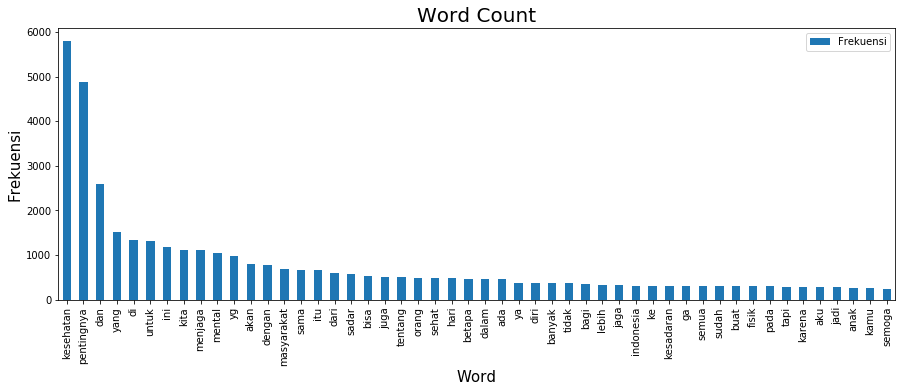

In [33]:
import matplotlib.pyplot as plt
a.plot.bar(figsize = (15,5))
plt.title('Word Count', size=20)
plt.xlabel('Word', size=15)
plt.ylabel('Frekuensi', size=15)
plt.show()
plt.show()

In [34]:
# import matplotlib.pyplot as plt
# import seaborn as sns

In [35]:
# coba = freq.copy()
# coba.reset_index(inplace=True)
# coba.head()

In [36]:
freq.reset_index(inplace=True)
freq.head()

,index,Frekuensi
0,kesehatan,5797
1,pentingnya,4867
2,dan,2586
3,yang,1513
4,di,1338


In [130]:
# hasil_token.head()
freq.to_csv("new.csv")